In [1]:
# connect the gdrive to import train and test csv
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Installing contractions , nltk, emoji , transformers

In [2]:
pip install contractions

     |████████████████████████████████| 287 kB 7.8 MB/s 
     |████████████████████████████████| 106 kB 48.0 MB/s 


In [3]:
pip install nltk

In [4]:
pip install emoji --upgrade

     |████████████████████████████████| 175 kB 8.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=03f2ef4aca85c2e2b58404c7af0755f8a5b8da815050582c7e2d7023597d35b7
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [5]:
pip install transformers

     |████████████████████████████████| 4.2 MB 10.1 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import re
import emoji

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

import contractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Import train and test csv

In [7]:
train = pd.read_csv('/content/gdrive/MyDrive/train.csv', names= ('stars','text'))
test = pd.read_csv('/content/gdrive/MyDrive/test.csv', names= ('stars','text'))

In [8]:
train.head(10)

,stars,text
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...
5,5,Top notch doctor in a top notch practice. Can'...
6,5,Dr. Eric Goldberg is a fantastic doctor who ha...
7,1,I'm writing this review to give you a heads up...
8,2,Wing sauce is like water. Pretty much a lot of...
9,3,Decent range somewhat close to the city. The ...


In [9]:
test.head(10)

,stars,text
0,1,I got 'new' tires from them and within two wee...
1,1,Don't waste your time. We had two different p...
2,1,All I can say is the worst! We were the only 2...
3,1,I have been to this restaurant twice and was d...
4,1,Food was NOT GOOD at all! My husband & I ate h...
5,3,This is a tiny Starbucks and it locations like...
6,2,Typical Starbucks coffee chain. 2 things I don...
7,4,So.Much.Fun! \n\nI WISH I could play a song at...
8,4,"My friend is a piano teacher, so I took it as ..."
9,3,Stopped by on a Mon evening after trying to di...


## **Section 1 : EDA**

1] Check if the Data is balanced or not

In [ ]:
# check if the train.csv (training dataset) is balanced
from collections import Counter
star_counts=Counter(train['stars'])
print(star_counts)
print(Counter(train['stars']))

Counter({5: 130000, 2: 130000, 4: 130000, 1: 130000, 3: 130000})
Counter({5: 130000, 2: 130000, 4: 130000, 1: 130000, 3: 130000})


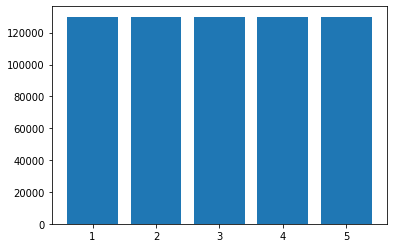

In [ ]:
# bar graph representing distribution of all 5 ratings in reviews for training dataset
from matplotlib import pyplot as plt
lists = sorted(star_counts.items()) 

x, y = zip(*lists) 

plt.bar(x, y)
plt.show()

In [ ]:
# check if the test.csv (training dataset) is balanced
from collections import Counter
star_counts=Counter(test['stars'])
print(star_counts)
print(Counter(test['stars']))

Counter({1: 10000, 3: 10000, 2: 10000, 4: 10000, 5: 10000})
Counter({1: 10000, 3: 10000, 2: 10000, 4: 10000, 5: 10000})


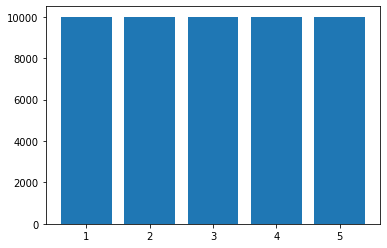

In [ ]:
# bar graph representing distribution of all 5 ratings in reviews for test dataset
from matplotlib import pyplot as plt
lists = sorted(star_counts.items()) 

x, y = zip(*lists) 

plt.bar(x, y)
plt.show()

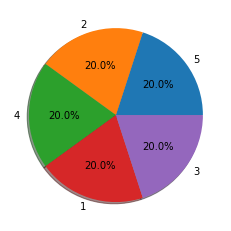

In [ ]:
stars_count = train["stars"].value_counts()
plt.pie(stars_count, labels=stars_count.index,
        autopct='%1.1f%%', shadow=True)
plt.show()

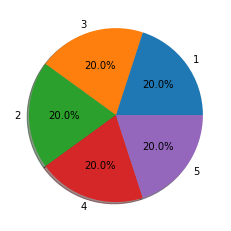

In [ ]:
stars_count = test["stars"].value_counts()
plt.pie(stars_count, labels=stars_count.index,
        autopct='%1.1f%%', shadow=True)
plt.show()

2] WordCloud - training dataset

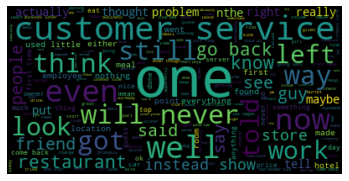

In [ ]:
# check for common words used for rating 1 star 
from wordcloud import WordCloud
Star_rating_1 = train[train["stars"]==1]
txt = " ".join(text.lower() for text in Star_rating_1["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



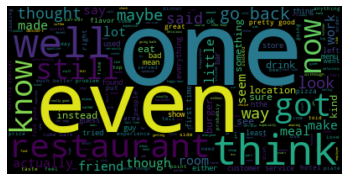

In [ ]:
# check for common words used for rating 2 star 
Star_rating_2 = train[train["stars"]==2]
txt = " ".join(text.lower() for text in Star_rating_2["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

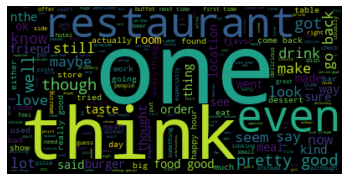

In [ ]:
# check for common words used for rating 3 star 
Star_rating_3 = train[train["stars"]==3]
txt = " ".join(text.lower() for text in Star_rating_3["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

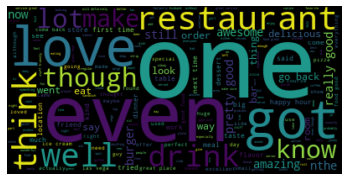

In [ ]:
# check for common words used for rating 4 star 
Star_rating_4 = train[train["stars"]==4]
txt = " ".join(text.lower() for text in Star_rating_4["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

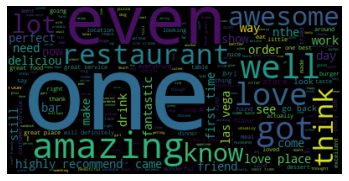

In [ ]:
# check for common words used for rating 5 star 
Star_rating_5 = train[train["stars"]==5]
txt = " ".join(text.lower() for text in Star_rating_5["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Section 2: Feature cleaning , Tokenization, Stemming**

The Yelp Dataset provided had a lot of unwanted information for classification purpose. Hence they are either decoded (eg: emojis , lower case, extended form of contractions) to meaningfull form or have been removed if they do not add weightage for the classification (eg : hashtags , urls , repeated words , punctuations)



In [10]:

# replace emojis with a meaningful text
def demojize(text):
  text = emoji.demojize(text)
  return text

# replace urls with blank (Removing urls)
def replace_url(text, default_replace=""):
  text = re.sub('(http|https):\/\/\S+', default_replace, text)
  return text

# replace hashtag with blank (removing hashtag)
def replace_hashtag(text, default_replace=""):
  text = re.sub('#+', default_replace, text)
  return text


# handle capitalized words (convert to lower case)
def to_lowercase(text):
  text = text.lower()
  return text

# for example word loooooook becomes look ; loooovee becomes love
def word_repetition(text):
  text = re.sub(r'(.)\1+', r'\1\1', text)
  return text

# replace punctuations with default value (remove punctuation)
def punct_repetition(text, default_replace=""):
  text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, text)
  return text


#  replaces contractions with their extended forms by using the contractions package
def fix_contractions(text):
  for k, v in contractions.contractions_dict.items():
    text = text.replace(k, v)
  return text

Tokenization and Stemming : For the following Dataset , I have tried using Custom Tokenization and SnowBall Stemmer.


In [11]:
#custom tokenize function
def custom_tokenize(text,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

#takes the list of tokens as input and returns a list of stemmed tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

Section 2 in action


In [12]:
def process_text(text, verbose=False):
  if verbose: print("Initial text: {}".format(text))

  ## Text Features
  
  
  text = replace_url(text) # replace url
  text = replace_hashtag(text) # replace hashtag
  if verbose: print("Post Text processing text: {}".format(text))

  ## Word Features
  text = to_lowercase(text) # lower case
  text = fix_contractions(text) # replace contractions
  text = punct_repetition(text) # replace punctuation repetition
  text = word_repetition(text) # replace word repetition
  text = demojize(text) # replace emojis
  if verbose: print("Post Word processing text: {}".format(text))

  ## Tokenization & Stemming
  tokens = custom_tokenize(text, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

Classify the Dataset as -

1] Positive review [1] = if rating is above 2

2] Negative review [0] = if rating is below 2

In [13]:
train["tokens"] = train["text"].apply(process_text)
#train["text_sentiment"] = train["stars"].apply(lambda i: 2 if (i > 3) else (1 if i==3 else 0))
train["text_sentiment"] = train["stars"].apply(lambda i: 1 if (i > 2) else 0)

# representing data frames in two lists: one for the text tokens (X) and one for the text sentiment (y)

X_train = train["tokens"].tolist()
y_train= train["text_sentiment"].tolist()

train.head(10)

,stars,text,tokens,text_sentiment
0,5,dr. goldberg offers everything i look for in a...,"[goldberg, offer, everyth, look, general, prac...",1
1,2,"Unfortunately, the frustration of being Dr. Go...","[unfortun, frustrat, goldberg, patient, repeat...",0
2,4,Been going to Dr. Goldberg for over 10 years. ...,"[go, goldberg, year, think, one, patient, star...",1
3,4,Got a letter in the mail last week that said D...,"[got, letter, mail, last, week, said, goldberg...",1
4,1,I don't know what Dr. Goldberg was like before...,"[not, know, goldberg, like, move, arizona, let...",0
5,5,Top notch doctor in a top notch practice. Can'...,"[top, notch, doctor, top, notch, practic, not,...",1
6,5,Dr. Eric Goldberg is a fantastic doctor who ha...,"[eric, goldberg, fantast, doctor, correct, dia...",1
7,1,I'm writing this review to give you a heads up...,"[write, review, give, head, see, doctor, offic...",0
8,2,Wing sauce is like water. Pretty much a lot of...,"[wing, sauc, like, water, pretti, much, lot, b...",0
9,3,Decent range somewhat close to the city. The ...,"[decent, rang, somewhat, close, citi, mat, pre...",1


In [14]:
test["tokens"] = test["text"].apply(process_text)
test["text_sentiment"] = test["stars"].apply(lambda i: 1 if (i > 2) else 0)

# representing data frames in two lists: one for the text tokens (X) and one for the text sentiment (y)

X_test = test["tokens"].tolist()
y_test = test["text_sentiment"].tolist()

test.head(10)

,stars,text,tokens,text_sentiment
0,1,I got 'new' tires from them and within two wee...,"[got, tire, ththem, within, two, week, got, fl...",0
1,1,Don't waste your time. We had two different p...,"[not, wast, time, two, differ, peopl, come, ho...",0
2,1,All I can say is the worst! We were the only 2...,"[say, worst, peopl, place, lunch, place, freez...",0
3,1,I have been to this restaurant twice and was d...,"[restaur, twice, disappoint, time, not, go, ba...",0
4,1,Food was NOT GOOD at all! My husband & I ate h...,"[food, not, good, husband, ate, coupl, week, a...",0
5,3,This is a tiny Starbucks and it locations like...,"[tini, starbuck, locat, like, although, cute, ...",1
6,2,Typical Starbucks coffee chain. 2 things I don...,"[typic, starbuck, coffe, chain, thing, dont, l...",0
7,4,So.Much.Fun! \n\nI WISH I could play a song at...,"[wish, could, play, song, drop, hat, bad, neve...",1
8,4,"My friend is a piano teacher, so I took it as ...","[friend, piano, teacher, took, good, sign, sin...",1
9,3,Stopped by on a Mon evening after trying to di...,"[stop, mon, even, tri, dine, smoke, taqueria, ...",1


Comparison between working of Lemmatizer and Stemming

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
tokens = ["international", "companies", "had", "interns"]

#stemming  
stemmer_snow = SnowballStemmer("english") # define stemmer

#lemmatization
word_pos = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Text lemma: {}".format(
    lemmatize_tokens(tokens, word_pos, lemmatizer)))

Text lemma: ['international', 'company', 'have', 'intern']


In [ ]:
print("Snowball stems: {}".format(stem_tokens(tokens, stemmer_snow)))

Snowball stems: ['intern', 'compani', 'had', 'intern']


## **Section 3: Vectorization**

I have used Tf-IDF for Vectorization purpose

2] TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#build the TF-IDF vectorizer with the corpus
def fit_tfidf(text_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(text_corpus)
  return tf_vect

## **Section 4: Model**

In [17]:
import seaborn as sn

# plot the confusion matrix for the different models 
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

SVM


In [ ]:
from sklearn.svm import LinearSVC
def fit_svc(X_train, y_train):
  model = LinearSVC()
  model.fit(X_train, y_train)
  return model

Model fitting for Tf-IDF

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [ ]:
# Fit the Logistic Regression model on training data by using the fit_lr function
model_lr_tf = fit_lr(X_train_tf, y_train)

In [ ]:
# Fit the SVM model on training data by using the fit_svc function

model_svc_tf = fit_svc(X_train_tf, y_train)

## **Setion 5 : Performance Matric**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
y_pred_svc_tf = model_svc_tf.predict(X_test_tf)

Logistic Regression Model Accuracy with TF-IDF

In [ ]:
print("LR Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))
accuracy_lr_tf = accuracy_score(y_test, y_pred_lr_tf)

LR Model Accuracy TF-IDF: 86.44%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

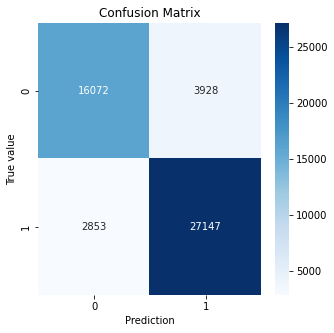

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

SVM Model with tf-idf


In [22]:

print("prediction:",list(y_pred_svc_tf[:10]))
print("Actual:    ",np.array(y_test[:10]))

prediction: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Actual:     [0 0 0 0 0 1 0 1 1 1]


In [23]:
print("SVC Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_svc_tf)))
accuracy_svc_tf = accuracy_score(y_test, y_pred_svc_tf)

SVC Model Accuracy TF-IDF: 86.53%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

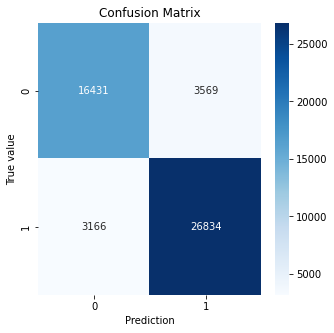

In [24]:
plot_confusion(confusion_matrix(y_test, y_pred_svc_tf))

Comparison of TF-idf models

([<matplotlib.axis.XTick at 0x7f2115e6e4d0>,
 [Text(0, 0, 'Logistic Reg'), Text(0, 0, 'SVM')])

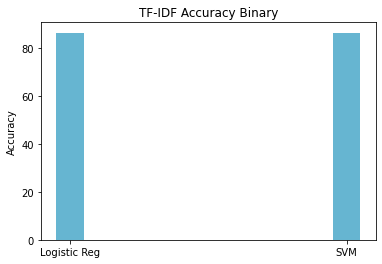

In [28]:
accuracy_lr_tf = 86.44
accuracy_svc_tf = 86.53
ax = plt.subplot(111)
ax.set_title('TF-IDF Accuracy Binary')
plt.ylabel('Accuracy')
models = ['Logistic Reg','SVM']
values = [accuracy_lr_tf,accuracy_svc_tf]
model = np.arange(len(models))
plt.bar(model,values,align='center',width=0.10,alpha=0.7,color='#2596be')
plt.xticks (model,models)